In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Factorizations

$$\bf A = LU$$
$$\bf A = QR$$
$$\bf S = Q\Lambda Q^T$$
$$\bf A = X\Lambda X^{-1}$$
$$\bf A = U\Sigma V^T$$

$\bf A = LU$ is "about elimination" for solving linear systems. $\bf L$ is the ***Lower Triangular*** and $\bf U$ is the ***Upper Triangular***. For an intvertable square matrix, this elimination factorization encapsulates the elementary row operations necessary for solving a linear system of equations $\bf Ax = b$.

$$ {\bf A} = 
\begin{bmatrix}
2 & 3 \\
4 & 7
\end{bmatrix}
\Rightarrow
\begin{bmatrix}
2 & 3 \\
0 & 1
\end{bmatrix}
= {\bf U}
$$

This matrix, $\bf U$, is the upper triangle. It was achieved by reducing the lower row of $\bf A$ through the elementary row operations of multiplying the first row by 2 and subtracting it from the second row.

So, thus far in this example we have derived a reduced form of the matrix $\bf A$ through elementary row operations. How could we achieve this form through matrix operations?

$${\bf LU = A} \Rightarrow 
\begin{bmatrix}
1 & 0 \\
2 & 1
\end{bmatrix}
\begin{bmatrix}
2 & 3 \\
0 & 1
\end{bmatrix}
=
\begin{bmatrix}
2 & 3 \\
4 & 7
\end{bmatrix}
$$

What is the point of elimination? Well, we use it to solve systems of equations. In this case we are able to reduce the second row (which is the second equation) to a single value - a solution. *What is really happening in elimination?* Functionally, the process of elimination for an [$n$x$n$] matrix $\bf A$ decomposes the matrix into the sum of rank 1 matrices:

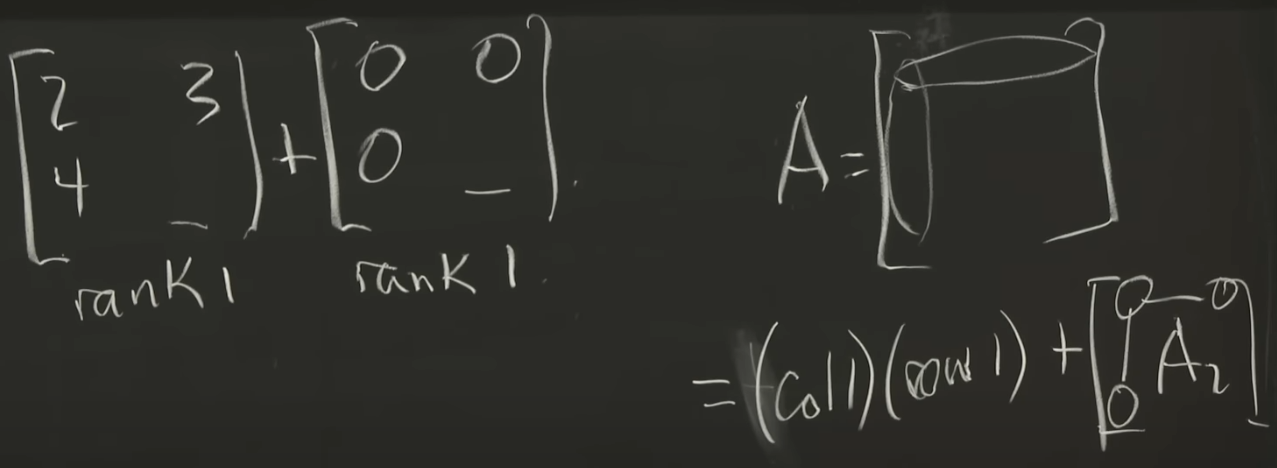

Then, because these matrices are rank 1, the empty spaces in each matrix will be filled by 6 and 1 respectively.

So, how can we look at these matrices as: $${\bf A = l_1u_1}^T + {\bf l_2u_2}^T$$
Where, ${\bf u_i}^T$ denotes the $i^{th}$ row of $\bf U$.

This is the elimination decomposition of $\bf A$. The pattern continues for higher dimensional matrices.

$\bf A = QR$ is "QR" decomposition that undergirds SVD and OLS. It is the ***Gram-Schmidt*** decomposition, whereing $\bf Q$ is an orthonormal matrix.

$\bf S = Q\Lambda Q^T$ is a factorization of a **symmetric** matrix $\bf S$. $\Lambda$ is a diagonal matrix of the eigenvalues of $\bf S$, and $\bf Q$ is an orthonormal matrix of eigenvectors of $\bf S$. Recall that a symmetric matrix is a square matrix that is *equal to its transpose*.
- Notes about eigenvectors and eigenvalues: 
    - Eigenvectors are orthogonal and any space $\mathbb{R}^n$ will have $n$ eigenvectors
    - Eigenvalues are all real values
- This is the ***Spectral Decomposition***

Let's call the column vectors of $\bf Q$ its **rank 1 matrices** (technically speaking: its column rank 1 matrices). We can then describe $\bf Q\Lambda Q^T$ as the sum of the eigenvalue weighted rank 1 matrix **outer products**:

$${\bf Q\Lambda Q}^T = \lambda_1{\bf q_1q_1}^T + \lambda_2{\bf q_2q_2}^T + \cdots \lambda_n{\bf q_nq_n}^T$$

These rank 1 matrices are of course the eigenvectors of $\bf S$. Let's look at what happens when we multiply $\bf Sq_1$:
$${\bf Sq_1} = \lambda_1{\bf q_1q_1}^T{\bf q_1} + \lambda_2{\bf q_2q_2}^T{\bf q_1} + \cdots \lambda_n{\bf q_nq_n}^T{\bf q_1} = \lambda_1{\bf q_1q_1}^T{\bf q_1} + 0$$
This is because the eigenvectors are necessarily orthogonal. Now, because the eigenvectors are **orthonormal** they have unit length and the inner product of unit vectors, their dot product, is 1! So, $${\bf q_1}^T{\bf q_1} = 1$$
And, $${\bf Sq_1} = \lambda_1 {\bf q_1}$$

**Aside:** Let's quickly prove that the dot product of a unit vector with itself is 1. In my `trefor_multivar` notes, we showed that:
$$\theta = \text{cos}^{-1}\left(\frac{\langle \vec{u}, \vec{v} \rangle}{\|\vec{u}\|\|\vec{v}\|}\right)$$
Let's replace $\vec{u}$ and $\vec{v}$ with $\vec{q}$ which has unit length. $\theta$, the angle between $\vec{q}$ and itself is necessarily 0, so:
$$\cos(0)\|\vec{q}\|\|\vec{q}\| = \vec{q}\cdot\vec{q} \Rightarrow 1 = \vec{q}\cdot\vec{q} = {\bf q}^T{\bf q}$$

This spectral decomposition is the eigendecomposition of symmetric matrices.

$\bf A = X\Lambda X^T$ is the eigendecomposition of a non-symmetric matrix (which may not always be achievable.

$\bf A = U\Sigma V^T$ is the SVD

## Fundamental Theorem of Linear Algebra

**Four Fundamental Subspaces:** (of [$m$x$n$] matrix $\bf A$ of rank $r$)
1. Column Space $C({\bf A})$ -- dim = $r$
2. Row Space $C({\bf A}^T)$ -- dim = $r$
3. Null Space $N({\bf A})$
4. Null Space $N({\bf A}^T)$

***Null Space*** is the set of vectors (solutions) to ${\bf A}\vec{x} = 0$. Note that the null space isn't taken from the matrix, rather its derived from the solutions of a transformation applied by the matrix to a vector. More generally speaking, the null space is the space spanned by the set of vectors that are solutions to ${\bf A}\vec{x} = 0$. Any linear operation applied to these vectors remains in that space. So, adding them or scaling them, all equal 0 when transformed by $\bf A$.

Think about the dimensions of the spaces in which each subspace exists. The column space will be in $\mathbb{R}^m$, because the number of rows in its columns are the number of directions in its basis vectors. Likewise, the row space will be in $\mathbb{R}^n$, because the number of columns in its rows (because its $C({\bf A}^T)$, really the number of rows in its columns) are the number of directions in its basis vectors. 

For the null spaces, it helps to consider the system of equations. The null space of the matrix, $N({\bf A})$, is in $\mathbb{R}^n$, because we must have $n$ solutions to ${\bf A} \vec{x} = 0$:
$$
{\bf A} \vec{x} = 0 \Rightarrow
\begin{bmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23}
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0
\end{bmatrix}
$$

Likewise, the null space of the transposed matrix, $N({\bf A}^T)$, will span $\mathbb{R}^m$.


Summarizing:
$$
\mathbb{R}^n \left\{ \begin{array}{rcl} C({\bf A}^T) \\ N({\bf A}) \end{array}\right.
\\
\mathbb{R}^m \left\{ \begin{array}{rcl} C({\bf A}) \\ N({\bf A}^T) \end{array}\right.
$$

What are the dimensions of the null spaces? **Note** by "dimension" I think we really mean the rank, or how many basis vectors are needed to span the space. For the column space and row space, we know that both have dim = $r$ because the row rank **is equal to** the column rank of a matrix. 

For the null spaces let's look at the solution to the system of equations example above. The null spaces are in $n$ and $m$ bercause they have $n$ and $m$ solutions, but some of these solutions are **trivial**. We will have $n$ solutions and $m$ equations for an [$m$x$n$] matrix. But of those equations, only $r$ are **independent**. So, the number of **nontrivial** solutions is $n - r$!

Let's hold on this for a moment. With $n$ solutiong, $r$ of them will be **constrained** and will equal some linear combination of the other $n - r$ solutions. So, to solve for ${\bf A}\vec{x} = 0$, we really need to find the $n - r$ solutions:
$$
{\bf A}\vec{x} =
\begin{bmatrix}
-1 & 3 & 2 \\
1 & 1 & 0 \\
1 & 1 & 0
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0 \\
0
\end{bmatrix}
\\
$$
$$
\Rightarrow \text{RREF: }
\begin{bmatrix}
1 & 0 & -0.5 \\
0 & 1 & 0.5 \\
0 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0 \\
0
\end{bmatrix}
$$

$$
\Rightarrow 
\begin{array}
 (x_1 - 0.5x_3 = 0 \\
 x_2 + 0.5x_3 = 0
\end{array}
\Rightarrow
\begin{array}
 (x_1 = 0.5x_3 \\
 x_2 = -0.5x_3 \\
 x_3 = x_3
\end{array}
\Rightarrow
\begin{bmatrix}
 0.5x_3 \\
 -0.5x_3 \\
 x_3
\end{bmatrix}
$$


In this example, the rank of the matrix is $r = 2$ so the first two solutions $x_1$ and $x_2$ are constrained. We are left with only one solution vector spanning the null space.

The dimension of the null space is often called the ***Nullity*** of a matrix. Now, we can observe that: $$n = r + n - r$$ $$m = r + m - r$$ This is called the ***Rank-Nullity Theorem***. The explicit geometry here is that the space $\mathbb{R}^n$ is spanned by the combination of the $r$ dimensional subspace $C({\bf A}^T)$ and the $n - r$ dimensional subspace $N({\bf A})$.

Another big takeaway, the subspaces in $\mathbb{R}^n$ are orthogonal to eachother ! **Bam** As are the subspaces in $\mathbb{R}^m$. Look at this example:
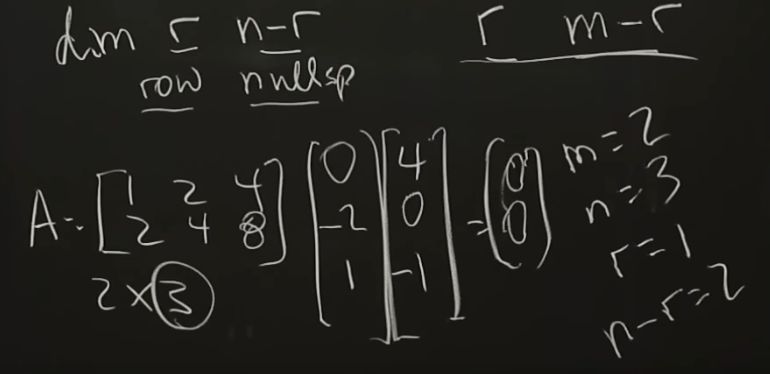

For $\bf A$, two vectors form the basis of the null space. These vectors, by definition, return 0 when dotted with the row vectors of $\bf A$. Therefore, the space which these vectors define, $N({\bf A})$, is orthogonal to the row space, $C({\bf A}^T)$ of $\bf A$.

## Problems

### P1

We are given $\vec{a}$ in $\mathbb{R}^m$ and $\vec{b}$ in $\mathbb{R}^p$. If we treat these vectors as column vectors then we **can** multiply ${\bf ab}^T$. The result is the Kronecker sum of the column vectors wherein the $i,j$ element of the matrix is the product of the $i^{th}$ element of $\bf a$ and the $j^{th}$ element of $\bf b$. The shape of the resulting matrix will be [$m$x$p$].

Ex:

In [6]:
a = np.array([[1,2,3,4]]).T
b = np.array([[4,2,6,9,8]]).T
print(a.shape)
print(b.shape)

a@b.T

(4, 1)
(5, 1)


array([[ 4,  2,  6,  9,  8],
       [ 8,  4, 12, 18, 16],
       [12,  6, 18, 27, 24],
       [16,  8, 24, 36, 32]])

The Kronecker sum of $\vec{a}$ and itself is given by ${\bf aa}^T$ with shape [$m$x$m$]. The diagonal of the matrix is the squared elements of $\vec{a}$. The resulting matrix is necessarily symmetrical.

In [9]:
a@a.T

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12],
       [ 4,  8, 12, 16]])

### P3

Decomposing the product of a matrix and the identity matrix into a sum of outer products yields the original matrix:

In [25]:
B = np.identity(3)
A = np.random.randint(10, size=(3,3))
B, A

(array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 array([[8, 3, 0],
        [8, 0, 8],
        [4, 7, 6]]))

In [26]:
# product of AB = AI = A
A@B

array([[8., 3., 0.],
       [8., 0., 8.],
       [4., 7., 6.]])

In [28]:
# sum of col vector products = A
a1 = A[:,0].reshape(3,1)
a2 = A[:,1].reshape(3,1)
a3 = A[:,2].reshape(3,1)

b1 = B[:,0].reshape(3,1)
b2 = B[:,1].reshape(3,1)
b3 = B[:,2].reshape(3,1)

a1@b1.T + a2@b2.T + a3@b3.T

array([[8., 3., 0.],
       [8., 0., 8.],
       [4., 7., 6.]])

The rank one matrices in this sum have the shape [$n$x$n$] with the original values in their original indexes and zeros elsewhere. Ex:

In [30]:
a1@b1.T

array([[8., 0., 0.],
       [8., 0., 0.],
       [4., 0., 0.]])